In [1]:
import pandas as pd
from numpy import nan
import math
import numpy as np

In [2]:
data = pd.read_csv('full_data.csv',index_col=0)

C:\MyArcGISPro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (126,127,169) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#### read a excel file that contain feature name and unavailable code number
features = pd.read_excel('Features_missing.xlsx')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134420 entries, 0 to 134419
Columns: 226 entries, CASENUM to MVISOBSC
dtypes: float64(218), int64(1), object(7)
memory usage: 232.8+ MB


In [5]:
imputed_col = data.columns[data.columns.str.contains(pat = '_IM') ]

In [6]:
imputed_col

Index(['WKDY_IM', 'HOUR_IM', 'MINUTE_IM', 'EVENT1_IM', 'MANCOL_IM',
       'RELJCT1_IM', 'RELJCT2_IM', 'LGTCON_IM', 'WEATHR_IM', 'MAXSEV_IM',
       'NO_INJ_IM', 'ALCHL_IM', 'SEX_IM', 'INJSEV_IM', 'EJECT_IM',
       'PERALCH_IM', 'SEAT_IM', 'AGE_IM', 'HITRUN_IM', 'BDYTYP_IM', 'MDLYR_IM',
       'IMPACT1_IM', 'VEVENT_IM', 'PCRASH1_IM', 'MXVSEV_IM', 'NUMINJ_IM',
       'V_ALCH_IM'],
      dtype='object')

In [7]:
# list of repeated columns
repeated_col = ['DAY_WEEK', 'HOUR', 'MINUTE', 'HARM_EV', 'MAN_COLL', 'RELJCT1',
               'RELJCT2', 'LGT_COND', 'MAX_SEV', 'NUM_INJ','ALCOHOL','SEX',
               'INJ_SEV','EJECTION','DRINKING', 'SEAT_POS', 'AGE', 'HIT_RUN',
               'BODY_TYP', 'MOD_YEAR', 'IMPACT1', 'M_HARM', 'P_CRASH1', 'MAX_VSEV',
               'NUM_INJV', 'VEH_ALCH']

# drop the repeated columns
data = data.drop(repeated_col, axis=1)

# drop the repeated features 
for x in repeated_col:
    features = features[features['Feature'] != x]


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134420 entries, 0 to 134419
Columns: 200 entries, CASENUM to MVISOBSC
dtypes: float64(192), int64(1), object(7)
memory usage: 206.1+ MB


In [9]:
#### slicing the data that only contain not reported data code
Not_reported = features[features['Not_reported'].notnull()].reset_index(drop=True)
Not_reported = Not_reported.loc[:,['Feature','Not_reported']]

#### slicing the data that only contain Unknown data code
Unknown = features[features['Unknown'].notnull()].reset_index(drop=True)
Unknown = Unknown.loc[:,['Feature','Unknown']]

#### slicing the data that only contain none data code
none = features[features['None'].notnull()].reset_index(drop=True)
none = none.loc[:,['Feature','None']]

#### slicing the data that only contain Not_Applicable data code
Not_Applicable = features[features['Not_Applicable'].notnull()].reset_index(drop=True)
Not_Applicable = Not_Applicable.loc[:,['Feature','Not_Applicable']]

In [10]:
Not_reported.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
Feature         88 non-null object
Not_reported    88 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [11]:
Unknown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 2 columns):
Feature    136 non-null object
Unknown    136 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [12]:
Unknown

,Feature,Unknown
0,TYP_INT,9.900000e+01
1,WRK_ZONE,4.000000e+00
2,REL_ROAD,9.900000e+01
3,WEATHER1,9.900000e+01
4,WEATHER2,9.900000e+01
5,WEATHER,9.900000e+01
6,INT_HWY,9.000000e+00
7,CF1,9.900000e+01
8,CF2,9.900000e+01
9,CF3,9.900000e+01


In [13]:
none.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Feature    30 non-null object
None       30 non-null object
dtypes: object(2)
memory usage: 560.0+ bytes


In [14]:
Not_Applicable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Feature           36 non-null object
Not_Applicable    36 non-null float64
dtypes: float64(1), object(1)
memory usage: 656.0+ bytes


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134420 entries, 0 to 134419
Columns: 200 entries, CASENUM to MVISOBSC
dtypes: float64(192), int64(1), object(7)
memory usage: 206.1+ MB


In [16]:
#### change all the not reported number to NA
for x in range(Not_reported.shape[0]):
    feature = Not_reported.iloc[x,0]
    Not_reported_number = Not_reported.iloc[x,1]
    data[feature] = data[feature]. replace(Not_reported_number, np.nan)
    
#### change all the Unknown number to NA
for x in range(Unknown.shape[0]):
    feature = Unknown.iloc[x,0]
    Unknown_number = Unknown.iloc[x,1]
    data[feature] = data[feature]. replace(Unknown_number, np.nan)
    
#### change all the None number to NA
for x in range(none.shape[0]):
    feature = none.iloc[x,0]
    none_number = none.iloc[x,1]
    data[feature] = data[feature]. replace(none_number, np.nan)
    
#### change all the Not Applicable number to NA
for x in range(Not_Applicable.shape[0]):
    feature = Not_Applicable.iloc[x,0]
    Not_Applicable_number = Not_Applicable.iloc[x,1]
    data[feature] = data[feature]. replace(Not_Applicable_number, np.nan)

In [17]:
## MXVSEV_IM(maximum injury sustained in the vehicle)
## DEFORMED(amount of damage sustained by this vehicle(indicate by police))
## MAXSEV_IM(maximum injury of all person)
## INJSEV_IM(severity of this person)

In [18]:
# drop the columns that have too many missing values
# threshold = 0.5

frac = len(data) * 0.8
data_dropped = data.dropna(thresh=frac, axis = 1)
data_dropped = data_dropped.drop('MDAREAS', axis = 1)
data_dropped['MXVSEV_IM'] = data['MXVSEV_IM']
data_dropped['DEFORMED'] = data['DEFORMED']
data_dropped['MAXSEV_IM'] = data['MAXSEV_IM']
data_dropped['INJSEV_IM'] = data['INJSEV_IM']

data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134420 entries, 0 to 134419
Columns: 104 entries, CASENUM to DEFORMED
dtypes: float64(100), int64(1), object(3)
memory usage: 107.7+ MB


In [19]:
data_dropped

,CASENUM,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,VE_TOTAL,VE_FORMS,PVH_INVL,...,HITRUN_IM,BDYTYP_IM,MDLYR_IM,IMPACT1_IM,VEVENT_IM,PCRASH1_IM,MXVSEV_IM,NUMINJ_IM,V_ALCH_IM,DEFORMED
0,201800381338,4.0,56.0,208.0,208.0,1.0,9.0,4.0,4.0,0.0,...,0.0,4.0,2015.0,12.0,12.0,1.0,0.0,0.0,2.0,4.0
1,201800381338,4.0,56.0,208.0,208.0,1.0,9.0,4.0,4.0,0.0,...,0.0,14.0,2010.0,6.0,12.0,2.0,0.0,0.0,2.0,4.0
2,201800381338,4.0,56.0,208.0,208.0,1.0,9.0,4.0,4.0,0.0,...,0.0,14.0,2007.0,6.0,12.0,5.0,0.0,0.0,2.0,2.0
3,201800381338,4.0,56.0,208.0,208.0,1.0,9.0,4.0,4.0,0.0,...,0.0,9.0,2007.0,6.0,12.0,5.0,0.0,0.0,2.0,2.0
4,201800381366,4.0,56.0,214.0,214.0,1.0,7.0,3.0,3.0,0.0,...,0.0,9.0,2007.0,12.0,12.0,1.0,1.0,1.0,2.0,6.0
5,201800381366,4.0,56.0,214.0,214.0,1.0,7.0,3.0,3.0,0.0,...,0.0,9.0,2016.0,6.0,12.0,1.0,0.0,0.0,2.0,6.0
6,201800381366,4.0,56.0,214.0,214.0,1.0,7.0,3.0,3.0,0.0,...,0.0,66.0,1999.0,6.0,12.0,1.0,0.0,0.0,2.0,2.0
7,201800381374,4.0,56.0,214.0,214.0,1.0,6.0,2.0,2.0,0.0,...,0.0,34.0,2005.0,83.0,12.0,1.0,1.0,1.0,2.0,4.0
8,201800381374,4.0,56.0,214.0,214.0,1.0,6.0,2.0,2.0,0.0,...,0.0,34.0,2005.0,83.0,12.0,1.0,1.0,1.0,2.0,4.0
9,201800381374,4.0,56.0,214.0,214.0,1.0,6.0,2.0,2.0,0.0,...,0.0,5.0,2017.0,61.0,12.0,1.0,1.0,1.0,2.0,6.0


In [20]:
# check the unqiue number of NA in dataframe on rows
data_dropped.isnull().sum(axis=1).unique()

array([ 1,  2,  8,  3,  0,  4,  6,  7, 50, 66, 14,  5, 16, 10, 44, 53, 69,
       18,  9, 15, 13, 51, 67, 11, 12, 19, 52, 68, 48, 45, 20, 46, 47, 54,
       21, 17, 22, 23, 55, 65, 64], dtype=int64)

In [21]:
# drop the observations that have missing values
data_dropped = data_dropped.dropna().reset_index(drop= True)

In [22]:
data_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56563 entries, 0 to 56562
Columns: 104 entries, CASENUM to DEFORMED
dtypes: float64(100), int64(1), object(3)
memory usage: 44.9+ MB


In [23]:
#data_dropped.to_csv('data_dropped_0.5.csv')

In [24]:
data_dropped.head()

,CASENUM,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,VE_TOTAL,VE_FORMS,PVH_INVL,...,HITRUN_IM,BDYTYP_IM,MDLYR_IM,IMPACT1_IM,VEVENT_IM,PCRASH1_IM,MXVSEV_IM,NUMINJ_IM,V_ALCH_IM,DEFORMED
0,201800383942,4.0,64.0,306.0,64.0,1.0,6.0,2.0,2.0,0.0,...,0.0,15.0,2016.0,5.0,12.0,2.0,1.0,1.0,2.0,2.0
1,201800383942,4.0,64.0,306.0,64.0,1.0,6.0,2.0,2.0,0.0,...,0.0,15.0,2016.0,5.0,12.0,2.0,1.0,1.0,2.0,2.0
2,201800383942,4.0,64.0,306.0,64.0,1.0,6.0,2.0,2.0,0.0,...,0.0,34.0,2007.0,62.0,12.0,1.0,0.0,0.0,2.0,2.0
3,201800383966,4.0,56.0,189.0,189.0,1.0,10.0,2.0,2.0,0.0,...,0.0,48.0,2004.0,61.0,12.0,15.0,0.0,0.0,2.0,4.0
4,201800384395,3.0,48.0,85.0,48.0,1.0,10.0,1.0,1.0,0.0,...,0.0,4.0,2010.0,12.0,30.0,14.0,0.0,0.0,2.0,6.0


In [25]:
################# function to get the item list of a column which does not include nan
def items (df, c):
    vals = df[c].unique().tolist()
    # if it's numerical (numbers)
    if np.issubdtype(df[c].dtype, np.number) == True:
        vals = [x for x in vals if not math.isnan(x)]
        vals.sort()
        return vals
    else:
    # if it's str
        vals = [x for x in vals if x != np.nan]
        return vals

In [26]:
def inputnumerical ():
    lst = [] 
    lst = [x for x in input("Enter columns that don't need to encode (eg: AAA, BBB): ").split()] 
    return lst

In [27]:
################## encoding 
def encoding (df):
    current_progress = 0

    
    # ask user which (numerical) columns should be skipped in this process
    num_cols = inputnumerical()
    print('the number of column that dont need to encoded is', len(num_cols))
    # iterate columns
    for column in df:

        ## print progress
        current_progress = current_progress+1
        column_len = len(df.columns)
        if current_progress % 1 == 0:
            progress = current_progress/column_len *100
            #print('current column is', current_progress)
            print("progress is {}% complete.".format(round(progress,2)))        
    
    
        # check if the column is numerical
        if column in num_cols:
            continue
        # encoding
        else: 
            # get the length of the list of unique values
            unique = items(df, column)
            len_unique = len(unique)
            # make a new list contains 1,2,3,4,5...
            codes = list(range(0, len_unique))
            
            # using for loop to replace the value
            for i in range(0,len_unique):
                df[column].replace(to_replace = unique[i], value = codes[i], inplace = True)
                
 
    return df

In [28]:
######## columns that don't need to encode:
#CASENUM PJ STARATUM PSUSTRAT VEH_NO PER_NO STR_VEH MAKE MAK_MOD MODEL DR_ZIP VIN MCARR_I2 MCARR_ID TRLR1VIN TRLR2VIN TRLR3VIN PMODEL PMAK_MOD PVIN PMCARR_I1 PMCARR_I2 PMCARR_ID PHAZ_ID PTRLR1VIN PTRLR2VIN PTRLR3VIN HAZ_ID VE_TOTAL VE_FORMS PVH_INVL PERMVIT PERNOTMVIT NUM_INJ NUMINJ_IM WEIGHT AGE AGE_IM PBAGE NUMOCCS TRAV_SP MONTH YEAR DAY_WEEK HOUR MINUTE MOD_YEAR PMODYEAR PMONTH PHOUR PMINUTE


In [29]:
df = encoding(data_dropped)

Enter columns that don't need to encode (eg: AAA, BBB): CASENUM PJ STARATUM PSUSTRAT VEH_NO PER_NO STR_VEH MAKE MAK_MOD MODEL DR_ZIP VIN MCARR_I2 MCARR_ID TRLR1VIN TRLR2VIN TRLR3VIN PMODEL PMAK_MOD PVIN PMCARR_I1 PMCARR_I2 PMCARR_ID PHAZ_ID PTRLR1VIN PTRLR2VIN PTRLR3VIN HAZ_ID VE_TOTAL VE_FORMS PVH_INVL PERMVIT PERNOTMVIT NUM_INJ NUMINJ_IM WEIGHT AGE AGE_IM PBAGE NUMOCCS TRAV_SP MONTH YEAR DAY_WEEK HOUR MINUTE MOD_YEAR PMODYEAR PMONTH PHOUR PMINUTE
the number of column that dont need to encoded is 51
progress is 0.96% complete.
progress is 1.92% complete.
progress is 2.88% complete.
progress is 3.85% complete.
progress is 4.81% complete.
progress is 5.77% complete.
progress is 6.73% complete.
progress is 7.69% complete.
progress is 8.65% complete.
progress is 9.62% complete.
progress is 10.58% complete.
progress is 11.54% complete.
progress is 12.5% complete.
progress is 13.46% complete.
progress is 14.42% complete.
progress is 15.38% complete.
progress is 16.35% complete.
progress is 

In [30]:
df.head()

,CASENUM,REGION,PSU,PJ,PSU_VAR,URBANICITY,STRATUM,VE_TOTAL,VE_FORMS,PVH_INVL,...,HITRUN_IM,BDYTYP_IM,MDLYR_IM,IMPACT1_IM,VEVENT_IM,PCRASH1_IM,MXVSEV_IM,NUMINJ_IM,V_ALCH_IM,DEFORMED
0,201800383942,3.0,44.0,306.0,43.0,0.0,4.0,2.0,2.0,0.0,...,0.0,11.0,51.0,5.0,10.0,1.0,1.0,1.0,1.0,1.0
1,201800383942,3.0,44.0,306.0,43.0,0.0,4.0,2.0,2.0,0.0,...,0.0,11.0,51.0,5.0,10.0,1.0,1.0,1.0,1.0,1.0
2,201800383942,3.0,44.0,306.0,43.0,0.0,4.0,2.0,2.0,0.0,...,0.0,19.0,42.0,18.0,10.0,0.0,0.0,0.0,1.0,1.0
3,201800383966,3.0,36.0,189.0,57.0,0.0,8.0,2.0,2.0,0.0,...,0.0,24.0,39.0,17.0,10.0,14.0,0.0,0.0,1.0,2.0
4,201800384395,2.0,28.0,85.0,28.0,0.0,8.0,1.0,1.0,0.0,...,0.0,3.0,45.0,12.0,23.0,13.0,0.0,0.0,1.0,3.0


In [32]:
df.to_csv('data_encoded.csv')

In [2]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [35]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
df= pd.read_csv('data_encoded.csv')

C:\MyArcGISPro\bin\Python\envs\arcgispro-py3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (93) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
########
## 'MXVSEV_IM' is dependent variable

y1 = df['INJSEV_IM']
# get object list
object_list = list(df.select_dtypes(include=['object']).columns)

x1 = df.drop(['CASENUM','MXVSEV_IM','DEFORMED','MAXSEV_IM','INJSEV_IM','NUMINJ_IM'],axis = 1)
x1 = x1.drop(object_list, axis=1)

In [24]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, 
                                        test_size=0.3, random_state=42)
dt_basic = DecisionTreeClassifier()
dt_basic.fit(x1_train, y1_train)
y1_predict = dt_basic.predict(x1_test)
print('DT:',accuracy_score(y1_test, y1_predict))

DT: 0.8406505981495669


In [36]:
print(confusion_matrix(y1_test, y1_predict))

[[11448   507   153     3     9     1     0]
 [  442  1414   450    56    10     1     0]
 [  155   474   724   122    19     1     0]
 [    3    83   110   639    28     0     0]
 [    9    19    14    31    38     1     0]
 [    0     1     1     0     0     2     0]
 [    1     0     0     0     0     0     0]]


In [37]:
print(classification_report(y1_test, y1_predict))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95     12121
         1.0       0.57      0.60      0.58      2373
         2.0       0.50      0.48      0.49      1495
         3.0       0.75      0.74      0.75       863
         4.0       0.37      0.34      0.35       112
         5.0       0.33      0.50      0.40         4
         6.0       0.00      0.00      0.00         1

    accuracy                           0.84     16969
   macro avg       0.49      0.51      0.50     16969
weighted avg       0.84      0.84      0.84     16969



C:\MyArcGISPro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
rf_basic = RandomForestClassifier()
rf_basic.fit(x1_train, y1_train)
rf_predict = rf_basic.predict(x1_test)
print('RF:',accuracy_score(y1_test, y1_predict))

RF: 0.8410041841004184


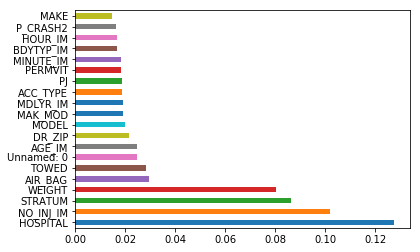

In [13]:
feat_importances = pd.Series(rf_basic.feature_importances_, index=x1.columns)
feat_importances.nlargest(20).plot(kind='barh')
pyplot.show()

In [14]:
knn_basic = KNeighborsClassifier()
knn_basic.fit(x1_train, y1_train)
y1_predict = knn_basic.predict(x1_test)
print('KNN:',accuracy_score(y1_test, y1_predict))

KNN: 0.6979786669809653


In [15]:
svc_basic = svm.SVC()
svc_basic.fit(x1_train, y1_train)
y1_predict = svc_basic.predict(x1_test)
print('SVC:',accuracy_score(y1_test, y1_predict))

SVC: 0.7143025517119453


In [16]:
xgb_basic = XGBClassifier()
xgb_basic.fit(x1_train, y1_train)
y1_predict = xgb_basic.predict(x1_test)
print('xgb: ',accuracy_score(y1_test, y1_predict))

xgb:  0.8770110200954682


In [26]:
from sklearn import decomposition
from lightgbm import LGBMClassifier
from sklearn import pipeline
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier()

# Create a pca object
pca = decomposition.PCA()

# tranform the data with PCA.
# Third, train a Decision Tree Classifier on the data.
pipe = pipeline.Pipeline(steps=[('pca', pca),
                           ('lgbm', lgbm)])

    
# Create lists of parameter for lgbmclassifier

    
params = {'lgbm__num_leaves': [60,70,80],
         'lgbm__max_depth': [4,8,12,16]}

lgbm_pca = GridSearchCV(estimator=pipe , param_grid=params, cv = 10)

In [27]:
lgbm_pca.fit(x1_train, y1_train)

C:\MyArcGISPro\bin\Python\envs\arcgispro-py3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('lgbm', LGBMClassifier())]),
             param_grid={'lgbm__max_depth': [4, 8, 12, 16],
                         'lgbm__num_leaves': [60, 70, 80]})

In [28]:
print('Best num_leaves:', lgbm_pca.best_estimator_.get_params()['lgbm__num_leaves'])
print('Best max_depth:', lgbm_pca.best_estimator_.get_params()['lgbm__max_depth'])

print(lgbm_pca.best_estimator_.get_params()['lgbm'])

Best num_leaves: 60
Best max_depth: 4
LGBMClassifier(max_depth=4, num_leaves=60)


In [29]:
y_predict = lgbm_pca.predict(x1_test)
accuracy_score(y1_test, y1_predict)

0.8406505981495669

In [17]:
for feature in zip(df.columns, rf_basic.feature_importances_):
    print(feature)

('Unnamed: 0', 0.02461873949172525)
('CASENUM', 0.004411388147695939)
('REGION', 0.014183177498094987)
('PSU', 0.01884177201360214)
('PJ', 0.013866077613805988)
('PSU_VAR', 0.0028023007676308415)
('URBANICITY', 0.08630466768852989)
('STRATUM', 0.006182930312509971)
('VE_TOTAL', 0.005629537256258519)
('VE_FORMS', 0.0007988068451867735)
('PVH_INVL', 0.002239844799811087)
('PEDS', 0.018355378061788163)
('PERMVIT', 0.001742371729401569)
('PERNOTMVIT', 0.013498160909092808)
('MONTH', 0.0)
('YEAR', 0.005191194612328049)
('TYP_INT', 0.002955076949879369)
('REL_ROAD', 0.004028424308163392)
('WEATHER1', 0.00021610755429919145)
('WEATHER2', 0.003971057204983963)
('WEATHER', 0.00014923194745062137)
('SCH_BUS', 0.0021791179437481555)
('INT_HWY', 0.011811039704115931)
('WKDY_IM', 0.016654248758151902)
('HOUR_IM', 0.01818863503476898)
('MINUTE_IM', 0.0049909275255657784)
('EVENT1_IM', 0.0069655534066757445)
('MANCOL_IM', 0.0012509372489939927)
('RELJCT1_IM', 0.00672997657449113)
('RELJCT2_IM', 0.005